In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv, os

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [8]:
#a little data preprocessing

train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

y_train = train['label']
y_test = test['label']
del train['label']
del test['label']

# convert to numpy rep for keras
x_train = train.values
x_test = test.values 
y_train = y_train.values
y_test = y_test.values 

# normalization and change to gray scale
x_train = x_train/255
x_test = x_test/255

# reshape 
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(y_train.shape)
print(y_test.shape)
print(x_train.shape)
print(x_test.shape)


(27455,)
(7172,)
(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [9]:
# find all unique labels: data for 9(J) and 25(Z) are missing
labels = np.array(np.unique(y_test))
numLabels = 24
print(labels)

# one hot encode the labels 
# for train set
ohe_labels_train = np.zeros((len(y_train), numLabels))
for i in range (len(y_train)):
    ohe_labels_train[i] = np.where(labels == y_train[i], 1, 0)

# for test set
ohe_labels_test = np.zeros((len(y_test), numLabels))
for i in range (len(y_test)):
    ohe_labels_test[i] = np.where(labels == y_test[i], 1, 0)



[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


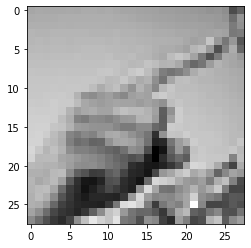

In [10]:
#plot an image 
plt.imshow(x_train[1], cmap = 'gray')

In [25]:
# convolutional model
img_rows = 28
img_cols = 28

model = Sequential()
model.add(Conv2D(filters=25, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Conv2D(filters=25, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Conv2D(filters=25, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(24, activation='softmax'))


# compile model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 28, 28, 25)        250       
                                                                 
 dropout_19 (Dropout)        (None, 28, 28, 25)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 25)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 25)        5650      
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 25)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 7, 7, 25)         0         
 g2D)                                                 

In [26]:
#train the model and save optimal parameters
#checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only='True')
#callbacks_list = [checkpoint]

training = model.fit(x_train, ohe_labels_train, validation_split=0.2, epochs=20) #callbacks=callbacks_list)

Epoch 1/20
687/687 [==============================] - 23s 31ms/step - loss: 1.3961 - accuracy: 0.6083 - val_loss: 0.7685 - val_accuracy: 0.8192
Epoch 2/20
687/687 [==============================] - 21s 31ms/step - loss: 0.2554 - accuracy: 0.9405 - val_loss: 0.2169 - val_accuracy: 0.9772
Epoch 3/20
687/687 [==============================] - 22s 32ms/step - loss: 0.0997 - accuracy: 0.9774 - val_loss: 0.1114 - val_accuracy: 0.9931
Epoch 4/20
687/687 [==============================] - 22s 32ms/step - loss: 0.0565 - accuracy: 0.9870 - val_loss: 0.0647 - val_accuracy: 0.9922
Epoch 5/20
687/687 [==============================] - 22s 31ms/step - loss: 0.0491 - accuracy: 0.9866 - val_loss: 0.0385 - val_accuracy: 0.9967
Epoch 6/20
687/687 [==============================] - 21s 31ms/step - loss: 0.0313 - accuracy: 0.9919 - val_loss: 0.0244 - val_accuracy: 0.9982
Epoch 7/20
687/687 [==============================] - 21s 31ms/step - loss: 0.0307 - accuracy: 0.9919 - val_loss: 0.0209 - val_accuracy:

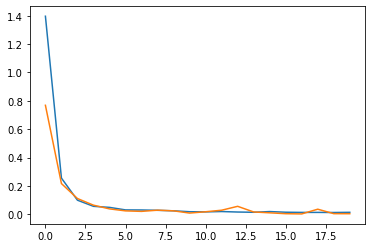

In [27]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.show()

In [28]:
score = model.evaluate(x=x_test, y=ohe_labels_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9601227045059204
